In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
im_path="hi.jpg"
img=cv2.imread(im_path)
print(img.shape)

(880, 1500, 3)


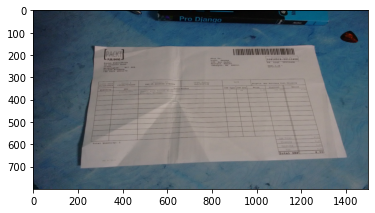

In [3]:
img=cv2.resize(img,(1500,800))
plt.imshow(img)
plt.show()

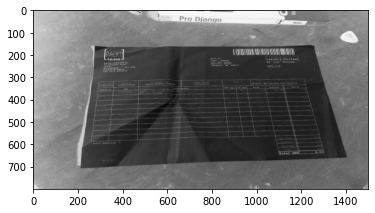

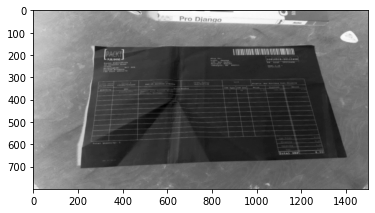

In [4]:
orig=img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='binary')
plt.show()

blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap='binary')
plt.show()

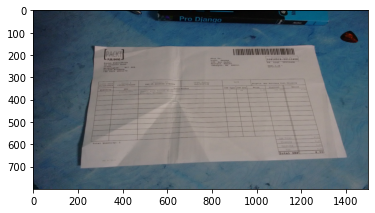

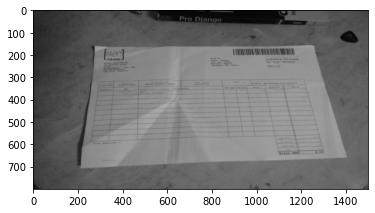

In [5]:

regen=cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

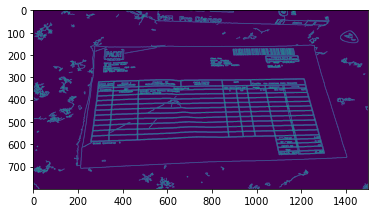

In [6]:
#Edge Detection
edge=cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.show()

In [7]:
#Contours Extraction
contours,_=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [8]:
for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.01*p,True)
    if len(approx)==4:
        target=approx
        break
print(target.shape)

(4, 1, 2)


In [9]:
#record target contour
def reorder(h):
    h=h.reshape((4,2))
    hnew=np.zeros((4,2),dtype=np.float32)
    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew
    

In [10]:
reorder=reorder(target)
print("***************")
print(reorder)

***************
[[ 276.  162.]
 [1260.  159.]
 [1405.  653.]
 [ 215.  707.]]


In [11]:
#project to a fixed screen
input_representation=reorder
output_map=np.float32([[0,0],[800,0],[800,800],[0,800]])

In [12]:
M=cv2.getPerspectiveTransform(input_representation,output_map)
dst=cv2.warpPerspective(orig,M,(800,800))

In [13]:
cv2.drawContours(img, [target], -1, (0, 255, 0), 2)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

In [14]:
ret,th1 = cv2.threshold(dst,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

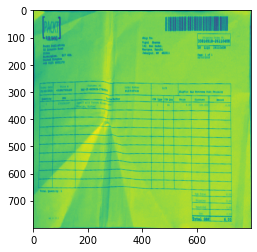

In [15]:
plt.imshow(dst)
plt.show()